In [1]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

# Importamos un filtro de warnings
from warnings import simplefilter
# Ignoramos los DeprecationWarnings, en concreto el del módulo six.py
simplefilter(action='ignore', category=DeprecationWarning)

# Hacemos ciertas configuraciones iniciales
%matplotlib inline
from preamble import *

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]
pandas version: 0.25.3
matplotlib version: 3.1.2
NumPy version: 1.17.3
SciPy version: 1.3.1
IPython version: 7.10.1
scikit-learn version: 0.21.3


In [6]:
X, y = mglearn.datasets.make_forge()

In [12]:
type(X)

numpy.ndarray

In [13]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [18]:
X.shape

(40, 1)

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [21]:
type(cancer)

sklearn.utils.Bunch

In [22]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
cancer.data.shape

(569, 30)

In [26]:
cancer.target.shape

(569,)

In [32]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
cancer.filename

'/home/dsc/anaconda3/envs/ks-sl/lib/python3.7/site-packages/sklearn/datasets/data/breast_cancer.csv'

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston.feature_names)
boston.data.shape

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 13)

In [38]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
#Importa el splitter de datasets de sklearn
from sklearn.model_selection import train_test_split

# Asigna datasets y etiquetas
X, y = mglearn.datasets.make_forge()

# Asigna training y test a datasets y etiquetas
# Usa la variable random_state=0 como parámetro
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [4]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [40]:
# Importa el clasificador KNeighbors
from sklearn.neighbors import KNeighborsClassifier

# instancia la clase con 3 vecinos
clf = KNeighborsClassifier(n_neighbors=3)

In [43]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [46]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [47]:
clf.score(X_test, y_test)

0.8571428571428571

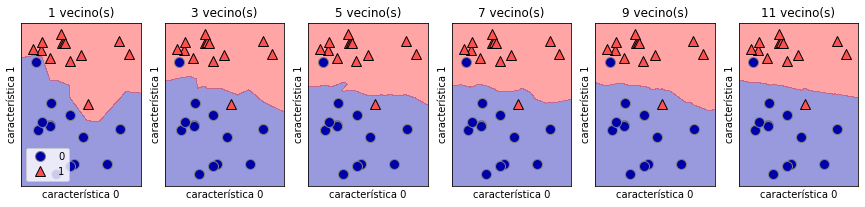

In [12]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for n_neighbors, ax in zip([1, 3, 5, 7, 9, 11], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")
axes[0].legend(loc=3)

In [13]:
# Importa el regressor KNeighbors
from sklearn.neighbors import KNeighborsRegressor

# Carga dataset y labels con el parámetro n_samples=40
X, y = mglearn.datasets.make_wave(n_samples=40)

# Partimos el dataset wave en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instanciamos el modelo y especificamos 3 vecinos
reg = KNeighborsRegressor(n_neighbors=3)
# Entrenamos el modelo usando los objetivo y datos de training
reg.fit(X_train, y_train)

# Muestra el resultado de las predicciones sobre test
print("Predicciones sobre el test set:\n", reg.predict(X_test) )

print(y_test)

print("Coeficiente de determinación del test set: {:.2f}".format(reg.score(X_test, y_test)))

Predicciones sobre el test set:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]
[ 0.373  0.218  0.967 -1.388 -1.06  -0.905  0.437  0.779 -0.541 -0.957]
Coeficiente de determinación del test set: 0.83


In [3]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18], [2, 15]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

MinMaxScaler(copy=True, feature_range=(0, 1))
[ 2. 18.]
[[0.    0.   ]
 [0.167 0.25 ]
 [0.333 0.5  ]
 [0.667 1.   ]
 [1.    0.812]]
[[1. 0.]]


In [3]:
line = np.linspace(-3, 3, 1000, endpoint=False)

In [11]:
line.shape

(1000,)

In [16]:
line = line.reshape(-1,1)

In [17]:
line.shape

(1000, 1)

In [19]:
X, y = mglearn.datasets.make_wave(n_samples=100) #Entradas, salidas

In [28]:
X.shape

(100, 1)

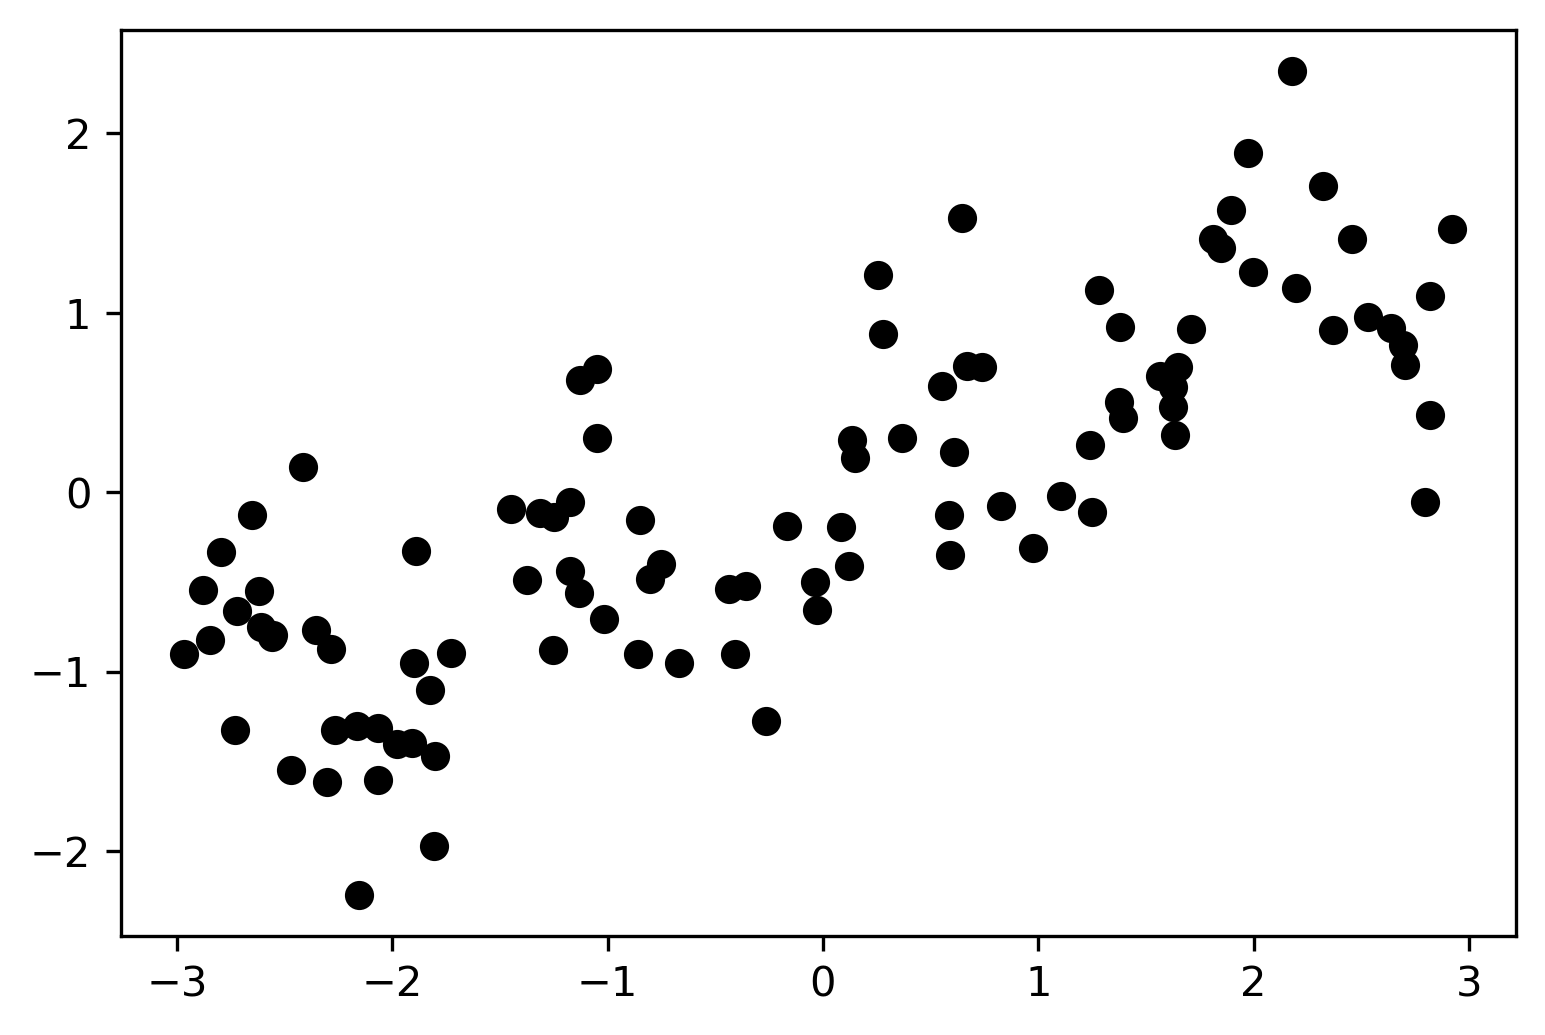

In [30]:
plt.plot(X[:, 0], y, 'o', c='k')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

reg = LinearRegression().fit(X, y)

In [36]:
reg.predict(line).shape

(1000,)

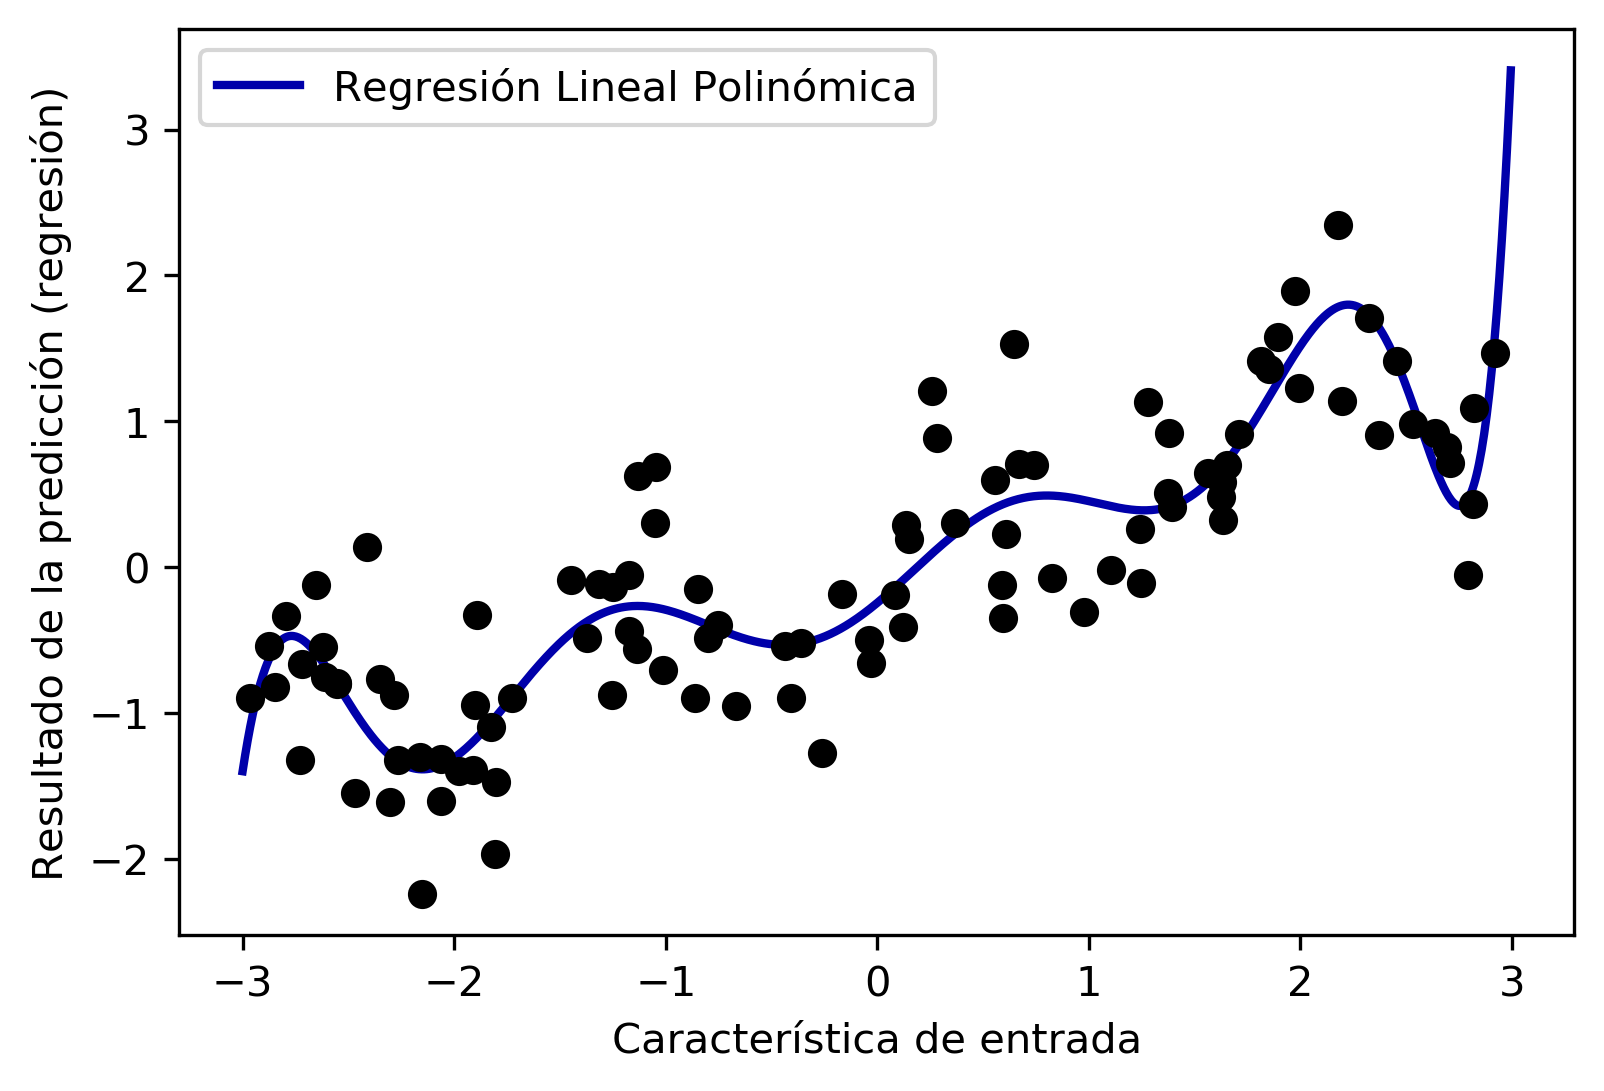

In [44]:
#Procedemos a instanciar un preprocesador de características polinómicas, 
#donde le estamos diciendo que cree un polinomio de grado 10 y aplique la transformación
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
# Creamos un dataset ampliado con este preprocesador
X_poly = poly.transform(X)
# Transformamos también el dataset de test
line_poly = poly.transform(line)

reg = LinearRegression().fit(X_poly, y)

plt.plot(line, reg.predict(line_poly), label='Regresión Lineal Polinómica')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Resultado de la predicción (regresión)")
plt.xlabel("Característica de entrada")
plt.legend(loc="best")

In [37]:
poly = PolynomialFeatures(degree=10, include_bias=False)

In [43]:
poly.fit(X)

PolynomialFeatures(degree=10, include_bias=False, interaction_only=False,
                   order='C')

In [42]:
type(poly)

sklearn.preprocessing.data.PolynomialFeatures

In [ ]:
np.column_stack()

In [65]:
data = {'Country':['Belgium', 'India', 'Brazil', 'YYY'], 'Capital':['Brussels', 'New Delhi', 'Brasilia', 'New Delhi'], 
        'Population':[909898, 880808977, 9787987, 98979]}

In [66]:
df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])

In [67]:
df

,Country,Capital,Population
0,Belgium,Brussels,909898
1,India,New Delhi,880808977
2,Brazil,Brasilia,9787987
3,YYY,New Delhi,98979


In [68]:
df.loc[df['Capital']=='New Delhi', ['Capital']]

,Capital
1,New Delhi
3,New Delhi


In [69]:
df.loc[df['Capital']=='New Delhi', ['Capital']] = 'hola'

In [70]:
df

,Country,Capital,Population
0,Belgium,Brussels,909898
1,India,hola,880808977
2,Brazil,Brasilia,9787987
3,YYY,hola,98979
